In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               3000 non-null   object 
 1   device_id               3000 non-null   object 
 2   location                3000 non-null   object 
 3   temperature             3000 non-null   float64
 4   humidity                3000 non-null   float64
 5   vibration_level         3000 non-null   float64
 6   inventory_status        3000 non-null   object 
 7   stock_quantity          3000 non-null   int64  
 8   order_id                3000 non-null   object 
 9   order_placed_date       3000 non-null   object 
 10  expected_delivery_date  3000 non-null   object 
 11  actual_delivery_date    3000 non-null   object 
 12  supplier_id             3000 non-null   object 
 13  supplier_rating         3000 non-null   float64
 14  logistics_partner       3000 non-null   

In [4]:
df.drop(['timestamp', 'device_id', 'order_id', 'order_placed_date',
         'supplier_id', 'social_media_feed', 'news_alert', 'system_log_message'],
        axis=1, inplace=True)


In [5]:
df.head()

,location,temperature,humidity,vibration_level,inventory_status,stock_quantity,expected_delivery_date,actual_delivery_date,supplier_rating,logistics_partner,shipment_status,weather_condition,manual_risk_label
0,Hub_C,27.48,48.62,1.98,in-stock,188,2024-03-29 11:21:41,2024-03-29 11:21:41,2.78,DHL,delivered,sunny,0
1,Hub_C,24.53,40.71,0.61,in-stock,359,2025-02-28 14:22:08,2025-03-02 14:22:08,1.08,FedEx,in-transit,sunny,0
2,Warehouse_A,22.10,44.75,0.30,in-stock,459,2025-02-01 12:30:19,2025-01-29 12:30:19,1.03,FedEx,delayed,sunny,0
3,Warehouse_A,25.11,45.72,0.77,in-stock,475,2025-04-05 16:42:30,2025-04-22 16:42:30,1.93,FedEx,in-transit,rainy,1
4,Warehouse_A,26.11,42.32,0.72,in-stock,243,2024-09-21 10:34:37,2024-09-20 10:34:37,1.19,UPS,in-transit,sunny,0


In [6]:
df['expected_delivery_date']=pd.to_datetime(df['expected_delivery_date'])
df['actual_delivery_date'] = pd.to_datetime (df['actual_delivery_date'])
df['delivery_delay_days'] = (df['actual_delivery_date']-df ['expected_delivery_date']).dt.days

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location                3000 non-null   object        
 1   temperature             3000 non-null   float64       
 2   humidity                3000 non-null   float64       
 3   vibration_level         3000 non-null   float64       
 4   inventory_status        3000 non-null   object        
 5   stock_quantity          3000 non-null   int64         
 6   expected_delivery_date  3000 non-null   datetime64[ns]
 7   actual_delivery_date    3000 non-null   datetime64[ns]
 8   supplier_rating         3000 non-null   float64       
 9   logistics_partner       3000 non-null   object        
 10  shipment_status         3000 non-null   object        
 11  weather_condition       3000 non-null   object        
 12  manual_risk_label       3000 non-null   int64   

In [8]:
df.drop(['expected_delivery_date', 'actual_delivery_date'], axis=1, inplace=True)
cat_cols = ['location', 'inventory_status', 'logistics_partner', 'shipment_status', 'weather_condition']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)





In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temperature                 3000 non-null   float64
 1   humidity                    3000 non-null   float64
 2   vibration_level             3000 non-null   float64
 3   stock_quantity              3000 non-null   int64  
 4   supplier_rating             3000 non-null   float64
 5   manual_risk_label           3000 non-null   int64  
 6   delivery_delay_days         3000 non-null   int64  
 7   location_Port_B             3000 non-null   int32  
 8   location_Warehouse_A        3000 non-null   int32  
 9   inventory_status_low        3000 non-null   int32  
 10  logistics_partner_DHL       3000 non-null   int32  
 11  logistics_partner_FedEx     3000 non-null   int32  
 12  logistics_partner_UPS       3000 non-null   int32  
 13  shipment_status_delivered   3000 

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('manual_risk_label', axis=1)
y = df['manual_risk_label']
X_train, X_test, y_train, y_test = train_test_split(
X, y,)
test_size=0.2,
random_state=42,
stratify=y
print(X_train.shape, X_test.shape)
print(y_train.value_counts (normalize=True))
print(y_test.value_counts (normalize=True))

(2250, 16) (750, 16)
manual_risk_label
0    0.677333
1    0.312889
2    0.009778
Name: proportion, dtype: float64
manual_risk_label
0    0.672
1    0.316
2    0.012
Name: proportion, dtype: float64


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
rf= RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_predrf =rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predrf))
print(classification_report(y_test, y_predrf))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00         9

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [15]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=42,class_weight='balanced',multi_class='multinomial',max_iter=1000)
lr.fit(X_train, y_train)
y_predlr =lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predlr))
print(classification_report(y_test, y_predlr))


C:\Users\poloj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00         9

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



C:\Users\poloj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


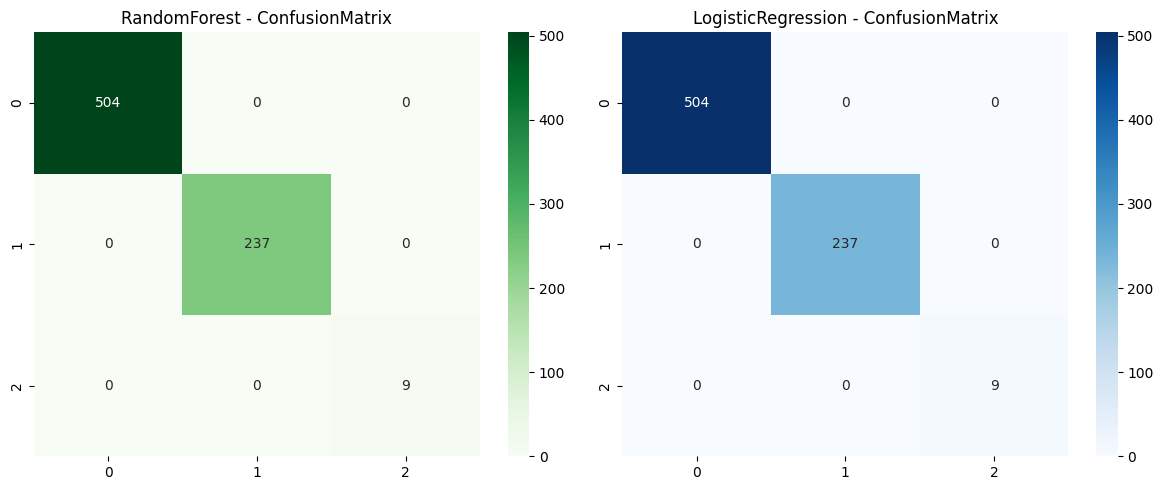

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

rf_conf_matrix = confusion_matrix(y_test, y_predrf)
lr_conf_matrix = confusion_matrix(y_test, y_predlr)

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('RandomForest - ConfusionMatrix')

sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('LogisticRegression - ConfusionMatrix')

plt.tight_layout()
plt.show()
